In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv('/Users/andy/Downloads/GiveMeSomeCredit/cs-training.csv', index_col=0)
print(data.shape)

data.head()

(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [4]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [5]:
# Reset the index
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

## 1. Data Processing



### *1.1 Missing value*

In [6]:
data.select_dtypes(include=['int64', 'float64']).describe().T.assign(miss_pcts = data.apply(lambda x: (len(x) - x.count()) / len(x)))

,count,mean,std,min,25%,50%,75%,max,miss_pcts
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.000000,0.000000,0.000000,1.0,0.000000
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.030132,0.154235,0.556494,50708.0,0.000000
age,149391.0,52.306237,14.725962,0.0,41.000000,52.000000,63.000000,109.0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.000000,0.000000,0.000000,98.0,0.000000
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.177441,0.368234,0.875279,329664.0,0.000000
MonthlyIncome,120170.0,6675.098269,14389.582246,0.0,3400.000000,5400.000000,8250.000000,3008750.0,0.195601
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,5.000000,8.000000,11.000000,58.0,0.000000
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.000000,0.000000,0.000000,98.0,0.000000
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.000000,1.000000,2.000000,54.0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.000000,0.000000,0.000000,98.0,0.000000


In [7]:
data['NumberOfDependents'].fillna(data['NumberOfDependents'].median(), inplace=True)
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [8]:
# using RandomForest to fill Null
def fill_missing_rf(X, y, to_fill):
    '''
    X: Feature matrix that we want to complete
    y: Label
    to_fill: str, name of the columns we plan to fill
    '''
    
    df = X.copy()
    fill = df.loc[:, to_fill]
    df = pd.concat([df.loc[:, df.columns != to_fill], pd.DataFrame(y)],axis=1)
    
    y_train = fill[fill.notnull()]
    y_test = fill[fill.isnull()]
    
    X_train = df.iloc[y_train.index, :]
    X_test = df.iloc[y_test.index, :]
    
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(X_train, y_train)
    y_predict = rfr.predict(X_test)
    
    return y_predict

In [9]:
%%time
X = data.iloc[:, 1:]
y = data.loc[:, 'MonthlyIncome']

MI_fill = fill_missing_rf(data.iloc[:, 1:], data['SeriousDlqin2yrs'], 'MonthlyIncome')

data.loc[data['MonthlyIncome'].isnull(), 'MonthlyIncome'] = MI_fill
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

### *1.2 Outliers*

In [10]:
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5425.513636,13236.865451,0.0,0.0,0.170000,1800.000000,4420.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

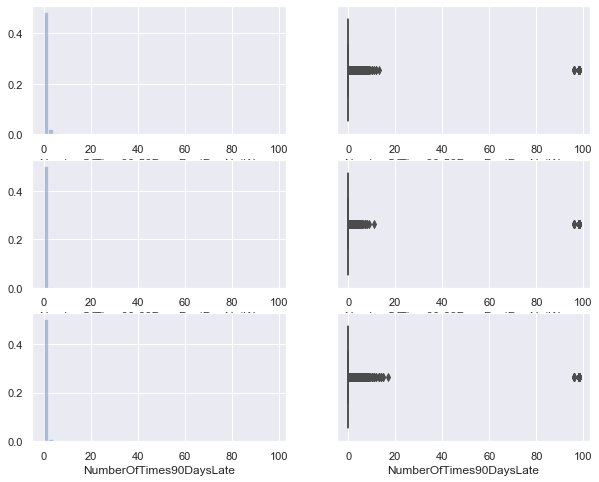

In [11]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize=(10, 8))

sns.distplot(data['NumberOfTime30-59DaysPastDueNotWorse'], hist=True, kde=False, norm_hist=True, ax = ax1)
sns.boxplot(x='NumberOfTime30-59DaysPastDueNotWorse', data=data, ax=ax2)

sns.distplot(data['NumberOfTime60-89DaysPastDueNotWorse'], hist=True, kde=False, norm_hist=True, ax = ax3)
sns.boxplot(x='NumberOfTime60-89DaysPastDueNotWorse', data=data, ax=ax4)

sns.distplot(data['NumberOfTimes90DaysLate'], hist=True, kde=False, norm_hist=True, ax = ax5)
sns.boxplot(x='NumberOfTimes90DaysLate', data=data, ax=ax6)

plt.show()

In [12]:
data = data[data.loc[:, 'RevolvingUtilizationOfUnsecuredLines'] <= 1]
data = data[data['age'] >= 18]

data = data[data.loc[:, 'NumberOfTime30-59DaysPastDueNotWorse'] < 90]
data = data[data.loc[:, 'NumberOfTime60-89DaysPastDueNotWorse'] < 90]
data = data[data.loc[:, 'NumberOfTimes90DaysLate'] < 90]

/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


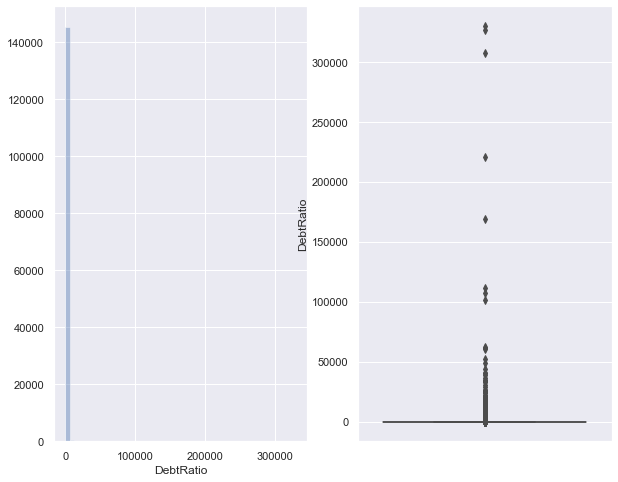

In [13]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 8))

sns.distplot(data.DebtRatio, hist=True, kde=False, ax=ax1)
sns.boxplot(y=data.DebtRatio, ax=ax2)
plt.show()

/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


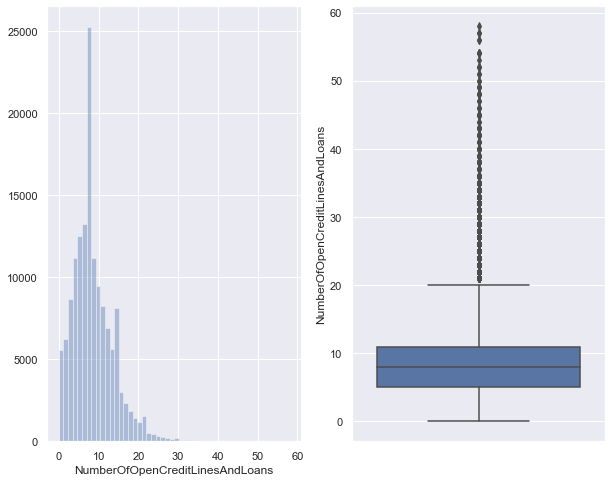

In [14]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 8))

sns.distplot(data.NumberOfOpenCreditLinesAndLoans, hist=True, kde=False, ax=ax1)
sns.boxplot(y=data.NumberOfOpenCreditLinesAndLoans, ax=ax2)
plt.show()

/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


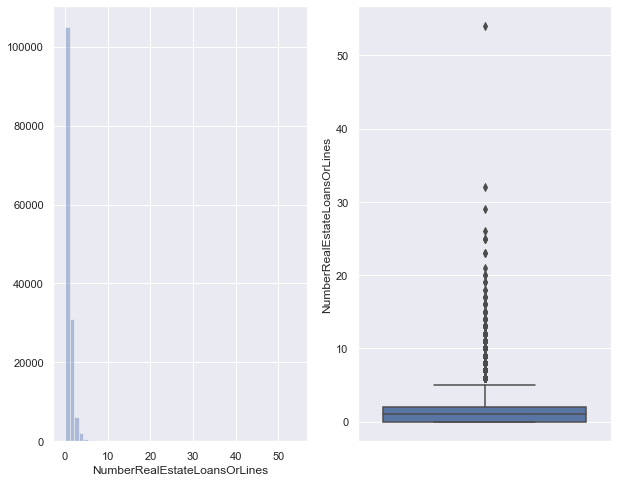

In [15]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 8))

sns.distplot(data.NumberRealEstateLoansOrLines, hist=True, kde=False, ax=ax1)
sns.boxplot(y=data.NumberRealEstateLoansOrLines, ax=ax2)
plt.show()

In [16]:
# Reset the index
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145844 entries, 0 to 145843
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      145844 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  145844 non-null  float64
 2   age                                   145844 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  145844 non-null  int64  
 4   DebtRatio                             145844 non-null  float64
 5   MonthlyIncome                         145844 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       145844 non-null  int64  
 7   NumberOfTimes90DaysLate               145844 non-null  int64  
 8   NumberRealEstateLoansOrLines          145844 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  145844 non-null  int64  
 10  NumberOfDependents                    145844 non-null  float64
dtype

In [17]:
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,145844.0,0.059214,0.236026,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
RevolvingUtilizationOfUnsecuredLines,145844.0,0.301914,0.335972,0.0,0.0,0.002876,0.028752,0.143856,0.514930,0.928829,1.0,1.0
age,145844.0,52.519521,14.703548,21.0,24.0,33.000000,42.000000,52.000000,63.000000,72.000000,87.0,109.0
NumberOfTime30-59DaysPastDueNotWorse,145844.0,0.229197,0.666361,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.0,13.0
DebtRatio,145844.0,357.463652,2061.539036,0.0,0.0,0.035363,0.178169,0.368532,0.879424,1294.000000,4999.0,329664.0
MonthlyIncome,145844.0,5451.930568,13373.406935,0.0,0.0,0.170000,1800.000000,4483.000000,7485.250000,10833.000000,23333.0,3008750.0
NumberOfOpenCreditLinesAndLoans,145844.0,8.541963,5.141940,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,25.0,58.0
NumberOfTimes90DaysLate,145844.0,0.078269,0.441574,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,17.0
NumberRealEstateLoansOrLines,145844.0,1.031712,1.132471,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,5.0,54.0
NumberOfTime60-89DaysPastDueNotWorse,145844.0,0.056704,0.303581,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,11.0


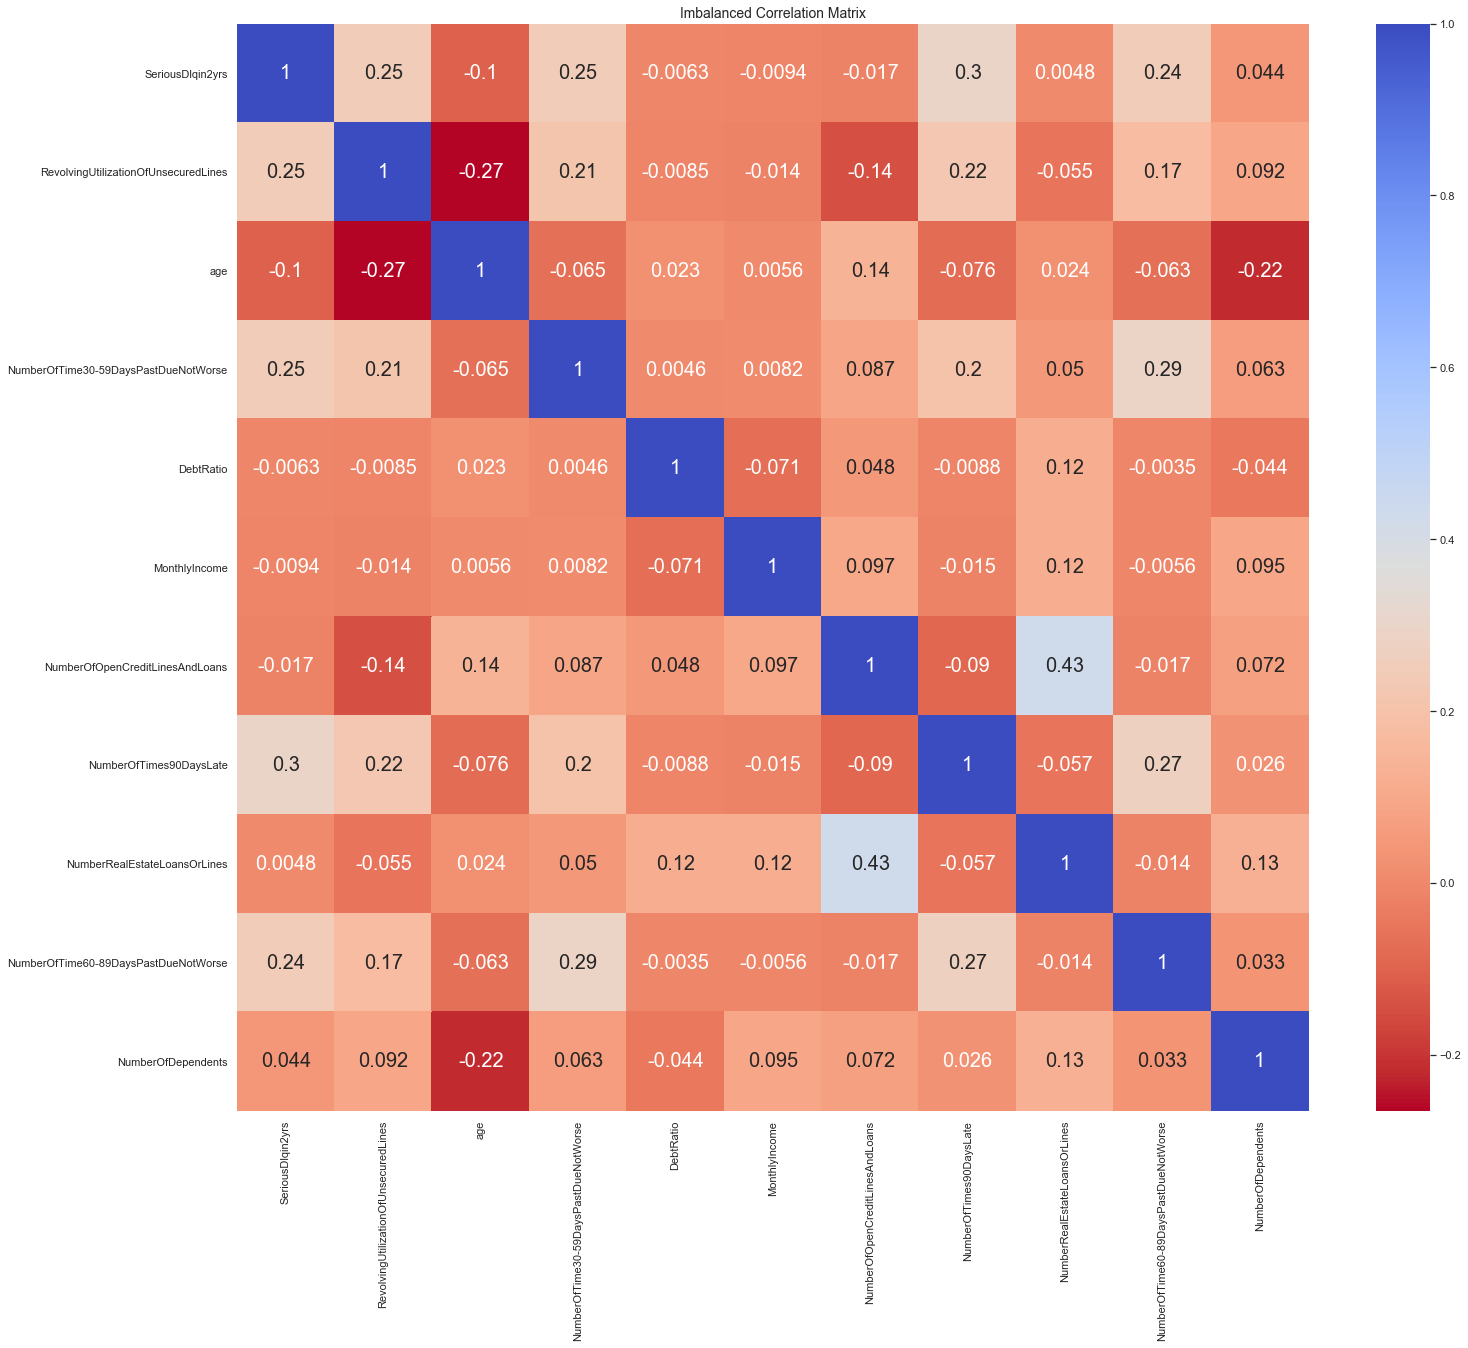

In [18]:
corr = data.corr()

f, ax1 = plt.subplots(1, figsize=(24,20))

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1, annot=True)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

### *1.3 Imbalanced sample*

In [19]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [20]:
y.value_counts()

0    137208
1      8636
Name: SeriousDlqin2yrs, dtype: int64

In [21]:
n_sample = X.shape[0]

n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print('# of samples: {}, 1 is {:.2%}; 0 is {:.2%}'.format(n_sample, n_1_sample/n_sample, n_0_sample/n_sample))

# of samples: 145844, 1 is 5.92%; 0 is 94.08%


In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_sample(X, y)

In [23]:
X_sm.shape[0]

274416

In [24]:
n_sample = X_sm.shape[0]

n_1_sample = y_sm.value_counts()[1]
n_0_sample = y_sm.value_counts()[0]

print('# of samples: {}, 1 is {:.2%}; 0 is {:.2%}'.format(n_sample, n_1_sample/n_sample, n_0_sample/n_sample))

# of samples: 274416, 1 is 50.00%; 0 is 50.00%


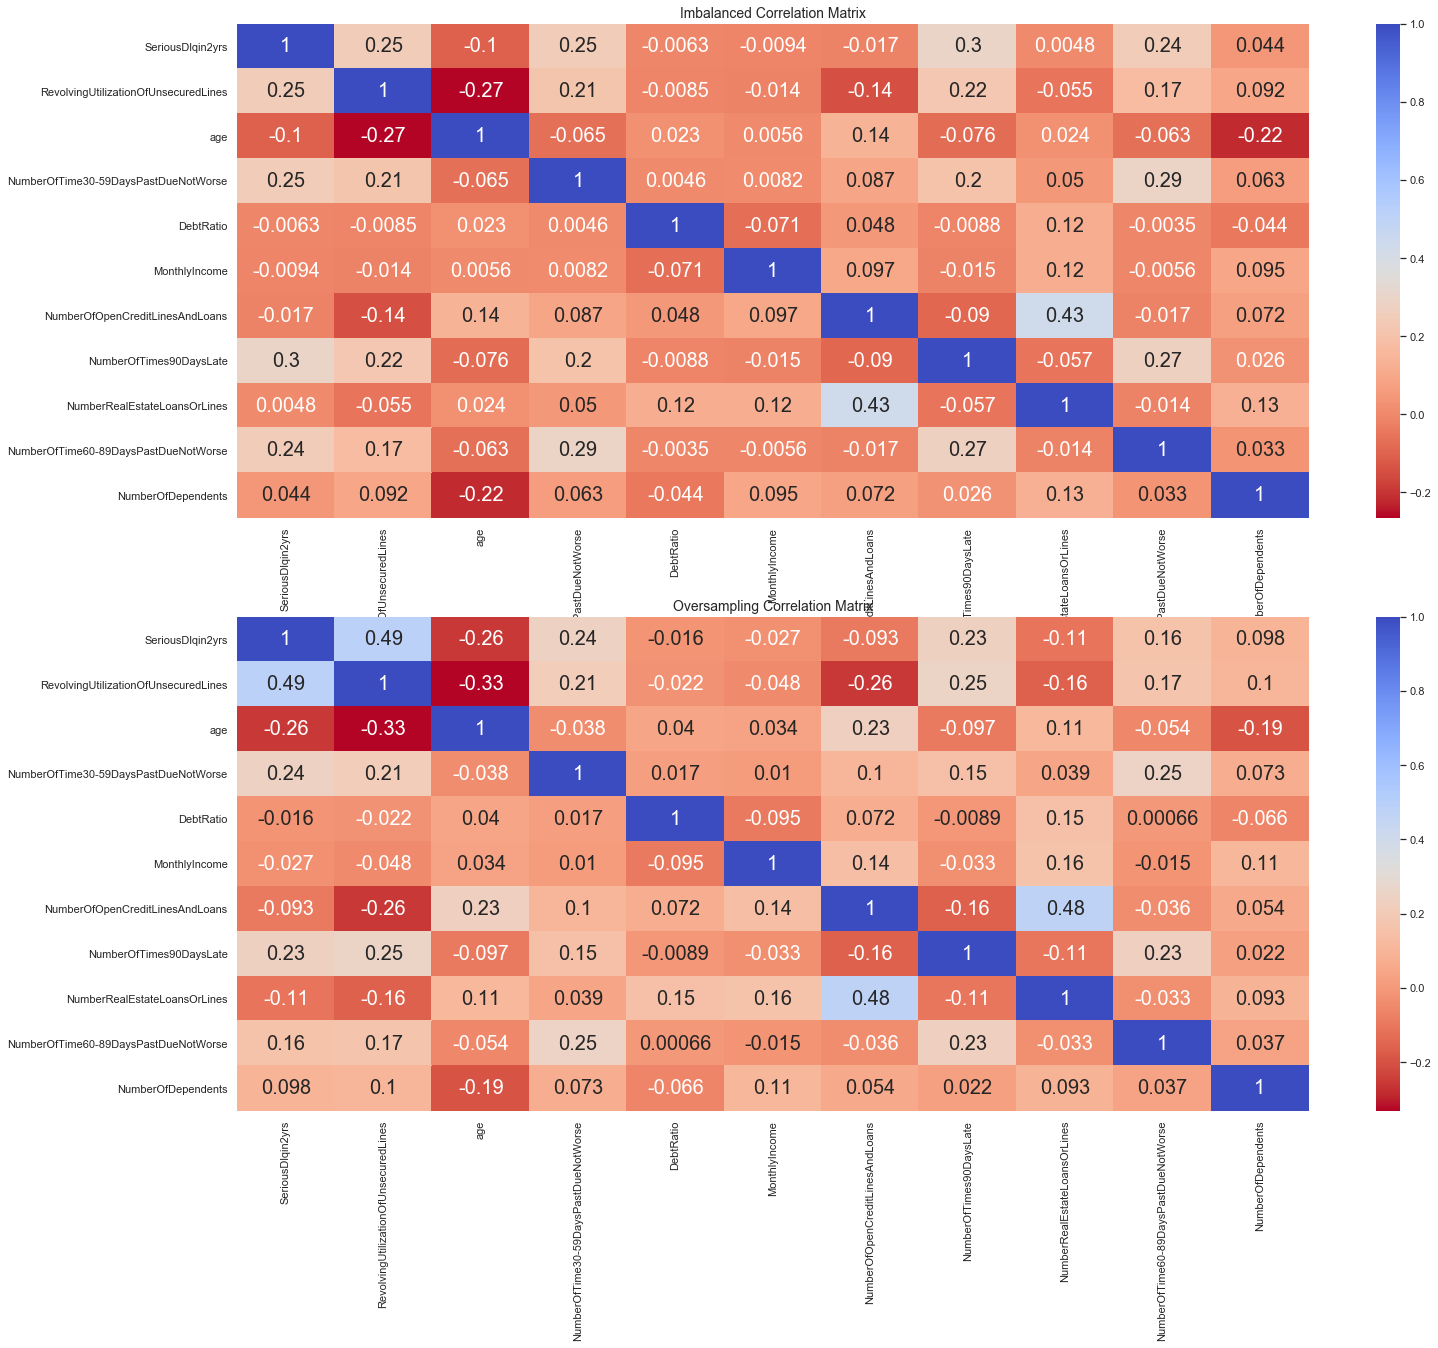

In [25]:
data_sm = pd.concat([y_sm, X_sm], axis=1)
corr = data.corr()
corr_sm = data_sm.corr()

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1, annot=True)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sns.heatmap(corr_sm, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,  annot=True)
ax2.set_title('Oversampling Correlation Matrix', fontsize=14)
plt.show()

## 2. Modelling

### *2.1 Data binning*

In [26]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X_sm)
y = pd.DataFrame(y_sm)

X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.3, random_state=42)

model_data = pd.concat([y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

vali_data = pd.concat([y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

model_data.to_csv('model_data.csv')
vali_data.to_csv('vali_data.csv')

#### *How many bins should we divide?*
• 4-5 bins would be better

• Information Value: $IV = \sum_{i=1}^{N} (good\% - bad\%) * WOE_i$

• Weight of Evidence: $WOE_i = ln(\frac{good\%}{bad\%}) = ln (\frac{G_i / G_{total}}{B_i / B_{total}})$

• Notes: **‘bad rate'** after binning are supposed to be **monotonous**


|      IV          |        Predictive Power      |
|      :---        |            :----:            |
|     < 0.02       |    useless for prediction    |
|   0.02 - 0.1     |         weak predictor       |
|    0.1 - 0.3     |        medium predictor      |
|    0.3 - 0.5     |        strong predictor      |
|      > 0.5       |      too good to be true     |

In [27]:
'''
q: # of bins
retbins: return which bin each data belongs to
updown: upside limit and downside limit
'''
model_data['qcut'], updown = pd.qcut(model_data['age'], retbins=True, q=20)

In [28]:
model_data['qcut'].value_counts()

(56.0, 59.0]      11944
(45.0, 47.0]      11244
(20.999, 28.0]    11223
(47.0, 49.0]      11169
(34.0, 37.0]      10831
(50.0, 52.0]      10454
(31.0, 34.0]      10296
(43.0, 45.0]      10019
(61.0, 64.0]       9998
(52.0, 54.0]       9670
(39.0, 41.0]       9612
(41.0, 43.0]       9570
(74.0, 109.0]      9055
(64.0, 68.0]       8993
(28.0, 31.0]       8949
(68.0, 74.0]       8818
(54.0, 56.0]       8727
(37.0, 39.0]       8447
(59.0, 61.0]       7636
(49.0, 50.0]       5436
Name: qcut, dtype: int64

In [29]:
count_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']

num_bins = [*zip(updown, updown[1:], count_y0, count_y1)]
num_bins

[(21.0, 28.0, 4062, 7161),
 (28.0, 31.0, 3428, 5521),
 (31.0, 34.0, 3887, 6409),
 (34.0, 37.0, 4464, 6367),
 (37.0, 39.0, 3505, 4942),
 (39.0, 41.0, 3929, 5683),
 (41.0, 43.0, 3973, 5597),
 (43.0, 45.0, 4350, 5669),
 (45.0, 47.0, 4781, 6463),
 (47.0, 49.0, 4820, 6349),
 (49.0, 50.0, 2373, 3063),
 (50.0, 52.0, 4601, 5853),
 (52.0, 54.0, 4620, 5050),
 (54.0, 56.0, 4567, 4160),
 (56.0, 59.0, 6621, 5323),
 (59.0, 61.0, 4462, 3174),
 (61.0, 64.0, 6858, 3140),
 (64.0, 68.0, 6659, 2334),
 (68.0, 74.0, 6800, 2018),
 (74.0, 109.0, 7586, 1469)]

In [30]:
# calculate WOE and IV
def get_woe(num_bins):
    columns = ['min', 'max', 'count_0', 'count_1']
    df = pd.DataFrame(num_bins, columns=columns)
    
    df['total'] = df.count_0 + df.count_1
    df['percentage'] = df.total / df.total.sum()
    df['bad_rate'] = df.count_1 / df.total
    df['good%'] = df.count_0 / df.count_0.sum()
    df['bad%'] = df.count_1 / df.count_1.sum()
    df['woe'] = np.log(df['good%'] / df['bad%'])
    
    return df

In [31]:
def get_iv(df):
    rate = df['good%'] - df['bad%']
    iv = np.sum(rate * df.woe)
    return iv

#### *ChiMerge*
• $\chi^2 = \sum_{i=1}^2 \sum_{j=1}^2 \frac{(A_{ij} - E_{ij})^2}{E_{ij}}$

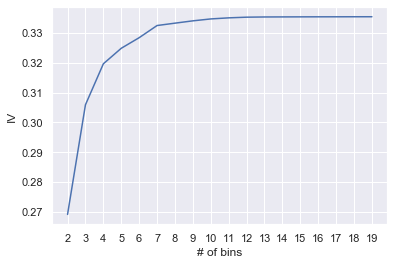

In [32]:
num_bins_ = num_bins.copy()

IV = []
axisx = []

while len(num_bins_) > 2:
    import scipy
    pvs = []
    
    # get Chi values of each pair in num_bins_
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        
        # [0] will return the Chi value, [1] will return the p-value
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        
        pvs.append(pv)
    
    # Merge the two bins with the largest p-value
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx, IV)
plt.xticks(axisx)
plt.xlabel('# of bins')
plt.ylabel('IV')
plt.show()

# for this case, 7 bins would be better

In [33]:
def get_bin(num_bins_, n):
    while len(num_bins_) > n:
        import scipy
        pvs = []
        
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        # combine those two bins that have max p-value
        num_bins_[i: i+2] = [(
                num_bins_[i][0],  # lower limit of the first bin
                num_bins_[i+1][1],  # upper limit of the second bin
                num_bins_[i][2] + num_bins_[i+1][2],
                num_bins_[i][3] + num_bins_[i+1][3])]
        
    return num_bins_


afterbins = get_bin(num_bins, 6)
afterbins

[(21.0, 34.0, 11377, 19091),
 (34.0, 52.0, 36796, 49986),
 (52.0, 56.0, 9187, 9210),
 (56.0, 61.0, 11083, 8497),
 (61.0, 74.0, 20317, 7492),
 (74.0, 109.0, 7586, 1469)]

In [34]:
bins_df = get_woe(num_bins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,34.0,11377,19091,30468,0.158612,0.626592,0.118085,0.199394,-0.523881
1,34.0,52.0,36796,49986,86782,0.451775,0.575995,0.381915,0.522074,-0.312611
2,52.0,56.0,9187,9210,18397,0.095772,0.500625,0.095354,0.096193,-0.008758
3,56.0,61.0,11083,8497,19580,0.101931,0.433963,0.115033,0.088746,0.259442
4,61.0,74.0,20317,7492,27809,0.144770,0.269409,0.210875,0.078250,0.991365
5,74.0,109.0,7586,1469,9055,0.047139,0.162231,0.078737,0.015343,1.635465


In [35]:
def graph_for_bestbin(DF, X, y, n=5, q=20, graph=True):
    '''
    ChiMerge
    
    parameters:
    DF: input data
    X: name of columns we need to bin
    y: label
    n: # of bins we want to retain
    q: initial # of bins
    graph: generate the IV image or not
    '''
    
    DF = DF[[X, y]].copy()
    DF['qcut'], bins = pd.qcut(DF[X], retbins=True, q=q, duplicates='drop')
    count_yo = DF.loc[DF[y] == 0].groupby(by='qcut').count()[y]
    count_yo = DF.loc[DF[y] == 1].groupby(by='qcut').count()[y]
    num_bins = [*zip(bins, bins[1:], count_y0, count_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break

            else:
                break
            
            
    # calculate WOE and IV
    def get_woe(num_bins):
        columns = ['min', 'max', 'count_0', 'count_1']
        df = pd.DataFrame(num_bins, columns=columns)

        df['total'] = df.count_0 + df.count_1
        df['percentage'] = df.total / df.total.sum()
        df['bad_rate'] = df.count_1 / df.total
        df['good%'] = df.count_0 / df.count_0.sum()
        df['bad%'] = df.count_1 / df.count_1.sum()
        df['woe'] = np.log(df['good%'] / df['bad%'])

        return df
    
    def get_iv(df):
        rate = df['good%'] - df['bad%']
        iv = np.sum(rate * df.woe)
        return iv
    
    
    # merge two bins with the largest p-value
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        
        i = pvs.index(max(pvs))
        
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    
    if graph:    
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of bins")
        plt.ylabel("IV")
        plt.show()
    else:
        return bins_df

In [36]:
model_data = pd.read_csv('model_data.csv')
model_data = model_data.iloc[:, 1:]
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192091 entries, 0 to 192090
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      192091 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  192091 non-null  float64
 2   age                                   192091 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  192091 non-null  int64  
 4   DebtRatio                             192091 non-null  float64
 5   MonthlyIncome                         192091 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       192091 non-null  int64  
 7   NumberOfTimes90DaysLate               192091 non-null  int64  
 8   NumberRealEstateLoansOrLines          192091 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  192091 non-null  int64  
 10  NumberOfDependents                    192091 non-null  float64
dtype

RevolvingUtilizationOfUnsecuredLines


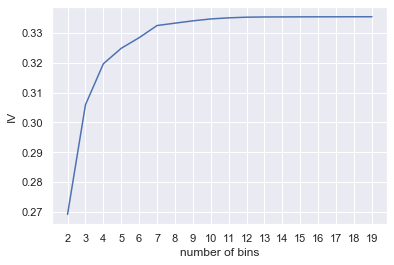

age


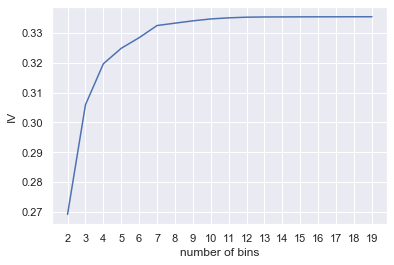

NumberOfTime30-59DaysPastDueNotWorse


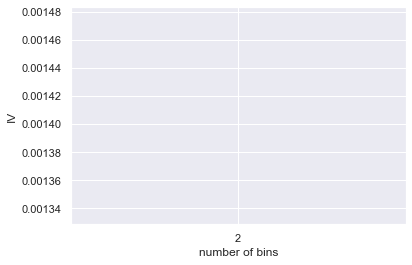

DebtRatio


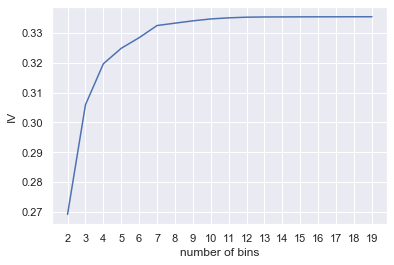

MonthlyIncome


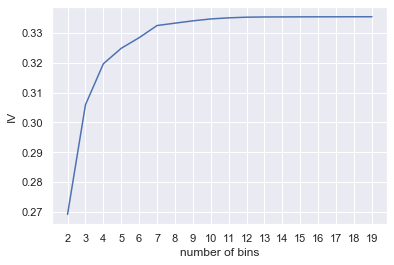

NumberOfOpenCreditLinesAndLoans


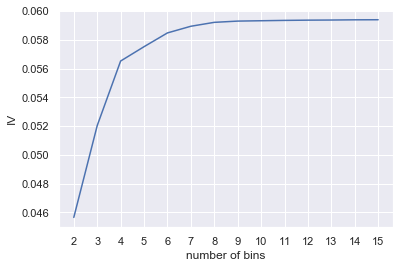

NumberOfTimes90DaysLate


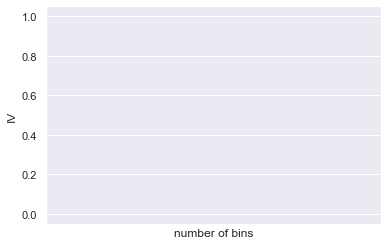

NumberRealEstateLoansOrLines


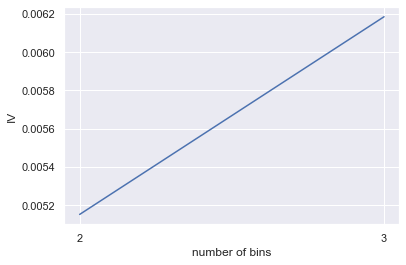

NumberOfTime60-89DaysPastDueNotWorse


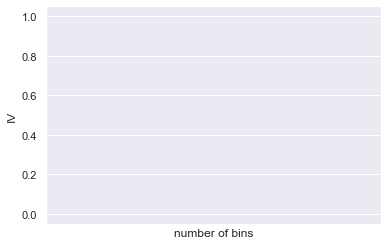

NumberOfDependents


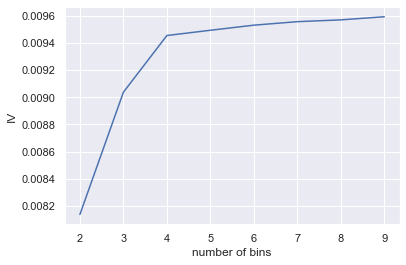

In [37]:
# some features do not support auto-binning
for i in model_data.columns[1:]:
    print(i)
    graph_for_bestbin(model_data, i, 'SeriousDlqin2yrs', n=2, q=20)

In [38]:
auto_col_bins = {'RevolvingUtilizationOfUnsecuredLines': 7,
                 'age': 7,
                 'DebtRatio': 7,
                 'MonthlyIncome': 7,
                 'NumberOfOpenCreditLinesAndLoans': 6}

hand_bins = {'NumberOfTime30-59DaysPastDueNotWorse':[0, 1, 2, 13],
             'NumberOfTimes90DaysLate':[0, 1, 2, 17],
             'NumberRealEstateLoansOrLines':[0, 1, 2, 4, 54],
             'NumberOfTime60-89DaysPastDueNotWorse':[0, 1, 2, 8],
             'NumberOfDependents':[0, 1, 2, 3]}
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [39]:
bins_of_col = {}

for col in auto_col_bins:
    bins_df = graph_for_bestbin(model_data,col
                             ,'SeriousDlqin2yrs'
                             ,n=auto_col_bins[col]
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
    
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.03207885292680921,
  0.572553431,
  0.7278171432139491,
  0.8689593807415377,
  0.9280590720829893,
  0.9999999,
  inf],
 'age': [-inf, 34.0, 52.0, 56.0, 61.0, 64.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.1267003572334703,
  0.5063117110000002,
  0.677117266716787,
  1.5035772407637495,
  140.25211459545648,
  2380.0,
  inf],
 'MonthlyIncome': [-inf,
  3.2242789328520787,
  5140.0,
  6250.0,
  7833.0,
  8900.360839350304,
  13000.0,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 3.0, 7.0, 12.0, 13.0, 15.0, inf]}

In [40]:
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.03207885292680921,
  0.572553431,
  0.7278171432139491,
  0.8689593807415377,
  0.9280590720829893,
  0.9999999,
  inf],
 'age': [-inf, 34.0, 52.0, 56.0, 61.0, 64.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.1267003572334703,
  0.5063117110000002,
  0.677117266716787,
  1.5035772407637495,
  140.25211459545648,
  2380.0,
  inf],
 'MonthlyIncome': [-inf,
  3.2242789328520787,
  5140.0,
  6250.0,
  7833.0,
  8900.360839350304,
  13000.0,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 3.0, 7.0, 12.0, 13.0, 15.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

### *2.2 mapping WOE*

In [41]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df['cut'] = pd.cut(df[col],bins)
    
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = bins_df['woe'] = np.log((bins_df[0]/bins_df[0].sum()) / (bins_df[1]/bins_df[1].sum()))
    
    return woe

In [42]:
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data, col, 'SeriousDlqin2yrs', bins_of_col[col])

woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0321]     2.473023
 (0.0321, 0.573]    0.329267
 (0.573, 0.728]    -1.028640
 (0.728, 0.869]    -1.321448
 (0.869, 0.928]    -1.402211
 (0.928, 1.0]      -0.911248
 (1.0, inf]        -0.006257
 dtype: float64, 'age': cut
 (-inf, 34.0]   -0.523881
 (34.0, 52.0]   -0.312611
 (52.0, 56.0]   -0.008758
 (56.0, 61.0]    0.259442
 (61.0, 64.0]    0.774936
 (64.0, 74.0]    1.122755
 (74.0, inf]     1.635465
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.127]        0.538812
 (0.127, 0.506]      -0.029974
 (0.506, 0.677]      -0.438825
 (0.677, 1.504]      -0.568144
 (1.504, 140.252]     0.239876
 (140.252, 2380.0]    0.136619
 (2380.0, inf]        0.153599
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 3.224]          0.415952
 (3.224, 5140.0]       -0.283657
 (5140.0, 6250.0]      -0.075651
 (6250.0, 7833.0]       0.091254
 (7833.0, 8900.361]     0.233763
 (8900.361, 13000.0]    0.366398
 (13000.0, inf]         0.331903
 dtype: float64, 'Numb

In [43]:
model_woe = pd.DataFrame(index=model_data.index)

for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(woeall[col])
    
model_woe['SeriousDlqin2yrs'] = model_data['SeriousDlqin2yrs']
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.329267,0.774936,0.239876,-0.283657,0.033493,0.303816,0.212334,0.167517,0.104884,0.630450,0
1,-0.911248,-0.312611,-0.438825,-0.283657,-0.508729,0.303816,-1.744732,-0.369162,0.104884,-0.509165,1
2,2.473023,-0.312611,-0.029974,-0.283657,-0.508729,0.303816,0.212334,0.167517,0.104884,0.630450,0
3,0.329267,-0.312611,-0.029974,0.366398,0.122962,0.303816,0.212334,0.575603,0.104884,-0.509165,1
4,-1.402211,-0.312611,0.538812,-0.075651,0.069864,0.303816,0.212334,-0.369162,-1.321430,-0.509165,1


### *2.3 Logistic Modelling*

In [44]:
vali_woe = pd.DataFrame(index=vali_data.index)

for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col], bins_of_col[col]).map(woeall[col])
    
    
vali_woe['SeriousDlqin2yrs'] = vali_data['SeriousDlqin2yrs']
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.329267,-0.312611,-0.568144,-0.283657,0.273835,0.303816,-1.744732,-0.396052,0.104884,-0.48008,0
1,-1.321448,-0.312611,-0.029974,-0.075651,0.122962,0.303816,0.212334,0.167517,0.104884,-0.48008,1
2,-0.911248,-0.312611,-0.568144,0.415952,-0.508729,0.303816,0.212334,-0.369162,0.104884,0.63045,0
3,0.329267,-0.312611,-0.568144,-0.283657,0.069864,0.303816,0.212334,0.332831,0.104884,0.63045,0
4,-0.911248,-0.312611,-0.438825,-0.283657,0.122962,-0.835629,-2.363383,0.167517,0.104884,0.63045,1


In [45]:
X = model_woe.iloc[:, :-1]
y = model_woe.iloc[:, -1]
vali_X = vali_woe.iloc[:, :-1]
vali_y = vali_woe.iloc[:, -1]

In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X, y)
LR.score(vali_X, vali_y)

0.766122077133313

In [47]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = LR.predict(vali_X)

cm = confusion_matrix(vali_y, y_pred_log_reg)
cm

array([[31555,  9307],
       [ 9947, 31516]])

#### *Precision-Recall*
• **Accuracy** $= \frac{TP + TN}{TP + TN + FP + FN}$

• **Precision**: $P = \frac{TP}{TP + FP}$, how many real defaults in our predictions

• **Recall**: $R = \frac{TP}{TP + FN}$, of all the default samples, how many can be detected

• **F1 score**: $F1 = 2 \frac{P \times R}{P + R}$

In [48]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(vali_y, y_pred_log_reg)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.7603248  0.77201578]
recall: [0.77223337 0.76009937]
fscore: [0.76623282 0.76601123]
support: [40862 41463]


#### *Receiver Operating Characteristic curve(ROC)*
• The area under the curve (AUC) can be used as a summary of the model skill

• True positive rate(Sensitivity, Recall) $ = \frac{TP}{TP + FN} $ 

• False positive rate $ = \frac{FP}{FP + TN} $

• Specificity $= \frac{TN}{TN + FP}$

• False positive rate = 1 - Specificity

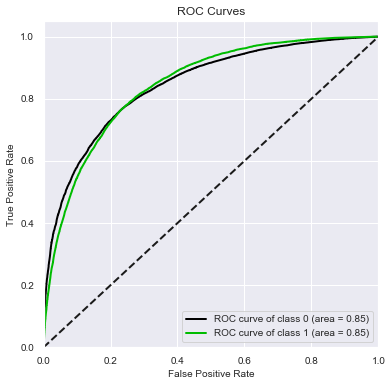

In [49]:
import scikitplot as skplt

vali_proba_df = pd.DataFrame(LR.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)

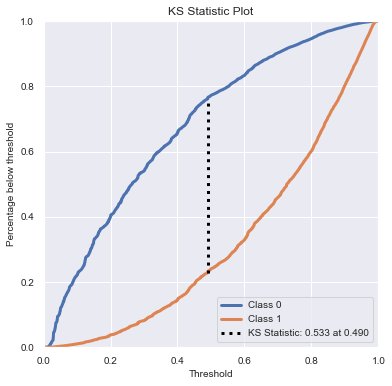

In [50]:
skplt.metrics.plot_ks_statistic(vali_y, vali_proba_df, figsize=(6, 6))
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV

param_gird = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}

grid_logistic = GridSearchCV(LogisticRegression(), param_gird, cv=10, scoring='roc_auc')
grid_logistic.fit(vali_X, vali_y)

/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/System/Volumes/Data/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' pena

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [52]:
grid_logistic.best_params_

{'C': 1000, 'class_weight': None, 'penalty': 'l2'}

In [53]:
best_LR = LogisticRegression(**grid_logistic.best_params_)
best_LR.fit(vali_X, vali_y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

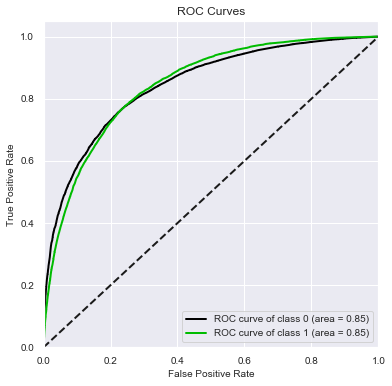

In [54]:
vali_proba_df_ = pd.DataFrame(best_LR.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df_,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)

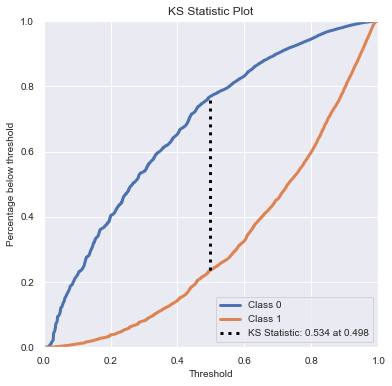

In [55]:
skplt.metrics.plot_ks_statistic(vali_y, vali_proba_df_, figsize=(6, 6))
plt.show()

### *2.5 ScoreCard*

$Score = Base \: Point + \frac{PDO}{ln(2)}(-y)$

• $y = logit(p) = ln \frac{p}{1-p}$

    • $P_0 = A - Blog(\theta_0)$

    • $P_0 + PDO = A - Blog(2\theta_0)$

• Base Point: A constant intercept, no practical meaning.

• PDO(Point-to-Double Odds): The score will increase PDO units with each doubling of good/bad ratio.

In [56]:
# for example
B = 10 / np.log(2)
A = 50 + B * np.log(1/20)

A, B

(6.7807190511263755, 14.426950408889635)

In [57]:
base_score = A - B * LR.intercept_
base_score

array([6.77079384])

In [58]:
score_age = woeall['age'] * (-B * LR.coef_[0][1])
score_age

cut
(-inf, 34.0]   -3.037298
(34.0, 52.0]   -1.812423
(52.0, 56.0]   -0.050775
(56.0, 61.0]    1.504163
(61.0, 64.0]    4.492836
(64.0, 74.0]    6.509385
(74.0, inf]     9.481919
dtype: float64